In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


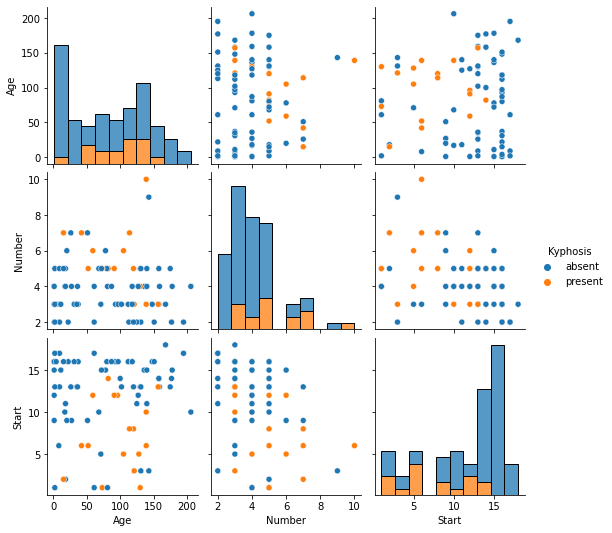

In [17]:
sns.pairplot(df,hue='Kyphosis',diag_kind='hist',diag_kws={'multiple': 'stack','bins':10})

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Kyphosis',axis=1)

In [21]:
y = df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
predictions = dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.75      0.83        20
     present       0.44      0.80      0.57         5

    accuracy                           0.76        25
   macro avg       0.69      0.78      0.70        25
weighted avg       0.84      0.76      0.78        25



In [54]:
print(confusion_matrix(y_test,predictions))

[[15  5]
 [ 1  4]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=200)

In [58]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
rfc_pred = rfc.predict(X_test)

In [60]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.94      0.75      0.83        20
     present       0.44      0.80      0.57         5

    accuracy                           0.76        25
   macro avg       0.69      0.78      0.70        25
weighted avg       0.84      0.76      0.78        25



In [61]:
print(confusion_matrix(y_test,rfc_pred))

[[15  5]
 [ 1  4]]


for larger datasets, a random forest classifier will typicaclly outshine a decision tree